In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from fastf1 import plotting
from ing_theme_matplotlib import mpl_style
import mplcyberpunk

In [3]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

*Qualifying*

In [4]:
quali = f1.get_session(2025, "Bahrain", "Qualifying")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (1.04 GB) /home/sohamdesai/.cache/fastf1
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '16', '12', '10

In [5]:
quali.session_info

{'Meeting': {'Key': 1257,
  'Name': 'Bahrain Grand Prix',
  'OfficialName': 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025',
  'Location': 'Sakhir',
  'Number': 4,
  'Country': {'Key': 36, 'Code': 'BRN', 'Name': 'Bahrain'},
  'Circuit': {'Key': 63, 'ShortName': 'Sakhir'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10010,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2025, 4, 12, 19, 0),
 'EndDate': datetime.datetime(2025, 4, 12, 20, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2025/2025-04-13_Bahrain_Grand_Prix/2025-04-12_Qualifying/'}

In [6]:
quali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,NaN,1.0,NaT,
63,RUS,Mercedes,NaN,2.0,NaT,
16,LEC,Ferrari,NaN,3.0,NaT,
12,ANT,Mercedes,NaN,4.0,NaT,
10,GAS,Alpine,NaN,5.0,NaT,
4,NOR,McLaren,NaN,6.0,NaT,
1,VER,Red Bull Racing,NaN,7.0,NaT,
55,SAI,Williams,NaN,8.0,NaT,
44,HAM,Ferrari,NaN,9.0,NaT,
22,TSU,Red Bull Racing,NaN,10.0,NaT,


In [7]:
quali_laps = quali.laps
quali_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:20:02.956000,PIA,81,NaT,1.0,1.0,0 days 00:17:48.888000,NaT,NaT,0 days 00:00:48.132000,...,True,McLaren,0 days 00:17:48.888000,2025-04-12 16:05:23.850,1,NaN,False,,False,False
1,0 days 00:21:34.348000,PIA,81,0 days 00:01:31.392000,2.0,1.0,NaT,NaT,0 days 00:00:29.287000,0 days 00:00:39.300000,...,True,McLaren,0 days 00:20:02.956000,2025-04-12 16:07:37.918,1,NaN,False,,False,True
2,0 days 00:23:35.891000,PIA,81,0 days 00:02:01.543000,3.0,1.0,NaT,0 days 00:23:34.171000,0 days 00:00:38.060000,0 days 00:00:50.877000,...,True,McLaren,0 days 00:21:34.348000,2025-04-12 16:09:09.310,1,NaN,False,,False,False
3,0 days 00:29:30.152000,PIA,81,NaT,4.0,2.0,0 days 00:27:14.444000,NaT,NaT,0 days 00:00:53.751000,...,False,McLaren,0 days 00:23:35.891000,2025-04-12 16:11:10.853,1,NaN,False,,False,False
4,0 days 00:31:29.404000,PIA,81,0 days 00:01:59.252000,5.0,2.0,NaT,0 days 00:31:27.651000,0 days 00:00:31.125000,0 days 00:00:52.778000,...,False,McLaren,0 days 00:29:30.152000,2025-04-12 16:17:05.114,1,NaN,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0 days 01:12:56.315000,TSU,22,0 days 00:01:31.637000,13.0,5.0,NaT,NaT,0 days 00:00:29.217000,0 days 00:00:39.410000,...,False,Red Bull Racing,0 days 01:11:24.678000,2025-04-12 16:58:59.640,1,NaN,False,,False,True
273,0 days 01:14:45.689000,TSU,22,0 days 00:01:49.374000,14.0,5.0,NaT,0 days 01:14:43.999000,0 days 00:00:33.224000,0 days 00:00:47.018000,...,False,Red Bull Racing,0 days 01:12:56.315000,2025-04-12 17:00:31.277,1,NaN,False,,False,False
274,0 days 01:19:35.468000,TSU,22,NaT,15.0,6.0,0 days 01:17:41.386000,NaT,NaT,0 days 00:00:49.813000,...,True,Red Bull Racing,0 days 01:14:45.689000,2025-04-12 17:02:20.651,1,NaN,False,,False,False
275,0 days 01:21:06.771000,TSU,22,0 days 00:01:31.303000,16.0,6.0,NaT,NaT,0 days 00:00:29.026000,0 days 00:00:39.377000,...,True,Red Bull Racing,0 days 01:19:35.468000,2025-04-12 17:07:10.430,1,NaN,False,,False,True


In [8]:
pia_quali_laps = quali.laps.pick_driver("PIA")
fastest_lap_pia_quali = pia_quali_laps.pick_fastest().LapTime
pia_quali_lap_time = pia_quali_laps["LapTime"]
pia_quali_sec1 = pia_quali_laps["Sector1Time"]
pia_quali_sec2 = pia_quali_laps["Sector2Time"]
pia_quali_sec3 = pia_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_quali), "which was in Lap number" ,pia_quali_laps.pick_fastest().LapNumber)
pia_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:29.841000 which was in Lap number 14.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:48.132000,0 days 00:00:29.724000,212.0,225.0,288.0,74.0
1,0 days 00:01:31.392000,0 days 00:00:29.287000,0 days 00:00:39.300000,0 days 00:00:22.805000,243.0,272.0,286.0,316.0
2,0 days 00:02:01.543000,0 days 00:00:38.060000,0 days 00:00:50.877000,0 days 00:00:32.606000,179.0,193.0,NaN,191.0
3,NaT,NaT,0 days 00:00:53.751000,0 days 00:00:30.378000,56.0,213.0,287.0,110.0
4,0 days 00:01:59.252000,0 days 00:00:31.125000,0 days 00:00:52.778000,0 days 00:00:35.349000,164.0,199.0,NaN,313.0


In [9]:
fastest_lap_pia_quali = pia_quali_laps.pick_fastest()
tele_pia_quali = fastest_lap_pia_quali.get_telemetry().add_distance()
speed_pia_quali = tele_pia_quali.Speed
tele_pia_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,291,7,11393
3,292,7,11208
4,294,7,10839
5,295,7,10660
6,297,8,10481
...,...,...,...
665,286,7,11502
666,287,7,11517
667,288,7,11532
668,290,7,11614


In [10]:
rus_quali_laps = quali.laps.pick_driver("RUS")
fastest_lap_rus_quali = rus_quali_laps.pick_fastest().LapTime
rus_quali_lap_time = rus_quali_laps["LapTime"]
rus_quali_sec1 = rus_quali_laps["Sector1Time"]
rus_quali_sec2 = rus_quali_laps["Sector2Time"]
rus_quali_sec3 = rus_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_quali), "which was in Lap number" ,rus_quali_laps.pick_fastest().LapNumber)
rus_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.009000 which was in Lap number 19.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
49,NaT,NaT,0 days 00:00:52.881000,0 days 00:00:32.529000,165.0,198.0,288.0,79.0
50,0 days 00:01:31.941000,0 days 00:00:29.278000,0 days 00:00:39.722000,0 days 00:00:22.941000,242.0,272.0,287.0,316.0
51,0 days 00:02:00.110000,0 days 00:00:37.652000,0 days 00:00:50.604000,0 days 00:00:31.854000,201.0,196.0,NaN,237.0
52,NaT,NaT,0 days 00:00:50.738000,0 days 00:00:25.915000,213.0,218.0,288.0,87.0
53,0 days 00:01:31.494000,0 days 00:00:29.223000,0 days 00:00:39.490000,0 days 00:00:22.781000,242.0,272.0,287.0,316.0


In [11]:
fastest_lap_rus_quali = rus_quali_laps.pick_fastest()
tele_rus_quali = fastest_lap_rus_quali.get_telemetry().add_distance()
speed_rus_quali = tele_rus_quali.Speed
tele_rus_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,293,8,10541
3,294,8,10575
4,296,8,10611
5,296,8,10642
6,297,8,10674
...,...,...,...
658,287,7,11169
659,287,7,10679
660,289,7,10468
661,292,8,10257


In [12]:
lec_quali_laps = quali.laps.pick_driver("LEC")
fastest_lap_lec_quali = lec_quali_laps.pick_fastest().LapTime
lec_quali_lap_time = lec_quali_laps["LapTime"]
lec_quali_sec1 = lec_quali_laps["Sector1Time"]
lec_quali_sec2 = lec_quali_laps["Sector2Time"]
lec_quali_sec3 = lec_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_quali), "which was in Lap number" ,lec_quali_laps.pick_fastest().LapNumber)
lec_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.175000 which was in Lap number 15.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
33,NaT,NaT,0 days 00:00:56.279000,0 days 00:00:28.045000,200.0,199.0,289.0,52.0
34,0 days 00:01:31.454000,0 days 00:00:28.967000,0 days 00:00:39.606000,0 days 00:00:22.881000,242.0,269.0,287.0,327.0
35,0 days 00:02:01.988000,0 days 00:00:39.487000,0 days 00:00:50.587000,0 days 00:00:31.914000,180.0,221.0,NaN,211.0
36,NaT,NaT,NaT,NaT,201.0,NaN,NaN,59.0
37,NaT,NaT,0 days 00:00:49.772000,0 days 00:00:26.573000,207.0,229.0,292.0,65.0


In [13]:
fastest_lap_lec_quali = lec_quali_laps.pick_fastest()
tele_lec_quali = fastest_lap_lec_quali.get_telemetry().add_distance()
speed_lec_quali = tele_lec_quali.Speed
tele_lec_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,292,7,11254
3,293,7,11080
4,293,7,10942
5,294,8,10804
6,295,8,10739
...,...,...,...
658,289,7,11653
659,291,7,11752
660,292,7,11397
661,293,7,11042


In [14]:
gas_quali_laps = quali.laps.pick_driver("GAS")
fastest_lap_gas_quali = gas_quali_laps.pick_fastest().LapTime
gas_quali_lap_time = gas_quali_laps["LapTime"]
gas_quali_sec1 = gas_quali_laps["Sector1Time"]
gas_quali_sec2 = gas_quali_laps["Sector2Time"]
gas_quali_sec3 = gas_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_gas_quali), "which was in Lap number" ,gas_quali_laps.pick_fastest().LapNumber)
gas_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.216000 which was in Lap number 18.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
89,NaT,NaT,0 days 00:00:50.664000,0 days 00:00:25.831000,164.0,179.0,285.0,105.0
90,0 days 00:01:32.212000,0 days 00:00:29.577000,0 days 00:00:39.573000,0 days 00:00:23.062000,240.0,270.0,284.0,314.0
91,0 days 00:01:59.060000,0 days 00:00:34.940000,0 days 00:00:53.256000,0 days 00:00:30.864000,204.0,186.0,NaN,281.0
92,NaT,NaT,0 days 00:00:48.638000,0 days 00:00:24.842000,162.0,210.0,285.0,88.0
93,0 days 00:01:31.462000,0 days 00:00:29.356000,0 days 00:00:39.267000,0 days 00:00:22.839000,241.0,272.0,288.0,315.0


In [15]:
fastest_lap_gas_quali = gas_quali_laps.pick_fastest()
tele_gas_quali = fastest_lap_gas_quali.get_telemetry().add_distance()
speed_gas_quali = tele_gas_quali.Speed
tele_gas_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,289,7,11444
3,289,7,11464
4,290,7,11503
5,294,8,10567
6,296,8,10611
...,...,...,...
659,286,7,11263
660,286,7,11303
661,287,7,11344
662,288,7,11385


In [16]:
ver_quali_laps = quali.laps.pick_driver("VER")
fastest_lap_ver_quali = ver_quali_laps.pick_fastest().LapTime
ver_quali_lap_time = ver_quali_laps["LapTime"]
ver_quali_sec1 = ver_quali_laps["Sector1Time"]
ver_quali_sec2 = ver_quali_laps["Sector2Time"]
ver_quali_sec3 = ver_quali_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_quali), "which was in Lap number" ,ver_quali_laps.pick_fastest().LapNumber)
ver_quali_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:30.423000 which was in Lap number 16.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
120,NaT,NaT,0 days 00:00:51.023000,0 days 00:00:24.901000,165.0,229.0,288.0,180.0
121,0 days 00:01:38.167000,0 days 00:00:29.277000,0 days 00:00:39.756000,0 days 00:00:29.134000,241.0,273.0,NaN,316.0
122,NaT,NaT,0 days 00:00:52.840000,0 days 00:00:30.835000,212.0,196.0,290.0,119.0
123,0 days 00:01:31.303000,0 days 00:00:29.121000,0 days 00:00:39.288000,0 days 00:00:22.894000,242.0,275.0,287.0,319.0
124,0 days 00:02:00.908000,0 days 00:00:36.428000,0 days 00:00:48.942000,0 days 00:00:35.538000,197.0,191.0,NaN,196.0


In [17]:
fastest_lap_ver_quali = ver_quali_laps.pick_fastest()
tele_ver_quali = fastest_lap_ver_quali.get_telemetry().add_distance()
speed_ver_quali = tele_ver_quali.Speed
tele_ver_quali.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,295,7,10827
3,296,8,10577
4,297,8,10615
5,298,8,10653
6,300,8,10692
...,...,...,...
664,287,7,11451
665,288,7,11500
666,290,7,11549
667,291,7,11541


In [18]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Pierre Gasly"] * len(gas_quali_sec1),
        "Sector1Time": gas_quali_sec1,
        "Sector2Time": gas_quali_sec2,
        "Sector3Time": gas_quali_sec3,
        "Lap Time": gas_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:29.287000,0 days 00:00:39.300000,0 days 00:00:22.805000,0 days 00:01:31.392000
2,Oscar Piastri,0 days 00:00:38.060000,0 days 00:00:50.877000,0 days 00:00:32.606000,0 days 00:02:01.543000
4,Oscar Piastri,0 days 00:00:31.125000,0 days 00:00:52.778000,0 days 00:00:35.349000,0 days 00:01:59.252000
7,Oscar Piastri,0 days 00:00:28.883000,0 days 00:00:38.853000,0 days 00:00:22.718000,0 days 00:01:30.454000
8,Oscar Piastri,0 days 00:00:34.994000,0 days 00:00:50.643000,0 days 00:00:36.402000,0 days 00:02:02.039000
10,Oscar Piastri,0 days 00:00:28.902000,0 days 00:00:38.771000,0 days 00:00:22.560000,0 days 00:01:30.233000
11,Oscar Piastri,0 days 00:00:35.746000,0 days 00:00:45.878000,0 days 00:00:28.092000,0 days 00:01:49.716000
13,Oscar Piastri,0 days 00:00:28.784000,0 days 00:00:38.574000,0 days 00:00:22.483000,0 days 00:01:29.841000
14,Oscar Piastri,0 days 00:00:38.220000,0 days 00:00:49.660000,0 days 00:00:42.089000,0 days 00:02:09.969000
16,George Russell,0 days 00:00:29.278000,0 days 00:00:39.722000,0 days 00:00:22.941000,0 days 00:01:31.941000


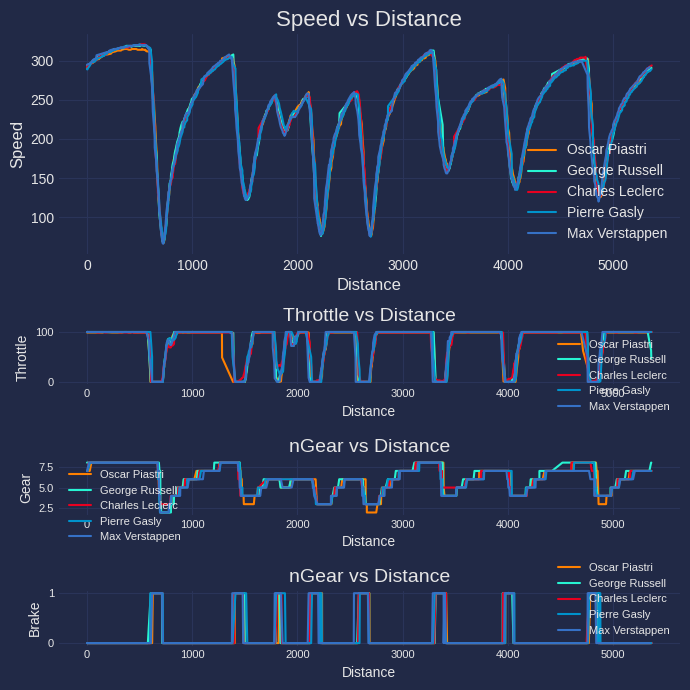

In [19]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = quali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_quali.Distance, tele_pia_quali.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_rus_quali.Distance, tele_rus_quali.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_lec_quali.Distance, tele_lec_quali.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_gas_quali.Distance, tele_gas_quali.Speed, label="Pierre Gasly", color=get_driver_color("GAS")
)
ax[0].plot(
    tele_ver_quali.Distance, tele_ver_quali.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_quali.Distance, tele_pia_quali.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_rus_quali.Distance, tele_rus_quali.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_lec_quali.Distance, tele_lec_quali.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_gas_quali.Distance, tele_gas_quali.Throttle, label="Pierre Gasly", color=get_driver_color("GAS")
)
ax[1].plot(
    tele_ver_quali.Distance, tele_ver_quali.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_quali.Distance, tele_pia_quali.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_rus_quali.Distance, tele_rus_quali.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_lec_quali.Distance, tele_lec_quali.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_gas_quali.Distance, tele_gas_quali.nGear, label="Pierre Gasly", color=get_driver_color("GAS")
)
ax[2].plot(
    tele_ver_quali.Distance, tele_ver_quali.nGear, label="Max Verstappen", color=get_driver_color("VER")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_quali.Distance, tele_pia_quali.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_rus_quali.Distance, tele_rus_quali.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_lec_quali.Distance, tele_lec_quali.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_gas_quali.Distance, tele_gas_quali.Brake, label="Pierre Gasly", color=get_driver_color("GAS")
)
ax[3].plot(
    tele_ver_quali.Distance, tele_ver_quali.Brake, label="Max Verstappen", color=get_driver_color("VER")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [20]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_quali_sec1),
        "Sector1Time": pia_quali_sec1,
        "Sector2Time": pia_quali_sec2,
        "Sector3Time": pia_quali_sec3,
        "Lap Time": pia_quali_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_quali_sec1),
        "Sector1Time": rus_quali_sec1,
        "Sector2Time": rus_quali_sec2,
        "Sector3Time": rus_quali_sec3,
        "Lap Time": rus_quali_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_quali_sec1),
        "Sector1Time": lec_quali_sec1,
        "Sector2Time": lec_quali_sec2,
        "Sector3Time": lec_quali_sec3,
        "Lap Time": lec_quali_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["Pierre Gasly"] * len(gas_quali_sec1),
        "Sector1Time": gas_quali_sec1,
        "Sector2Time": gas_quali_sec2,
        "Sector3Time": gas_quali_sec3,
        "Lap Time": gas_quali_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_quali_sec1),
        "Sector1Time": ver_quali_sec1,
        "Sector2Time": ver_quali_sec2,
        "Sector3Time": ver_quali_sec3,
        "Lap Time": ver_quali_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:29.287000,0 days 00:00:39.300000,0 days 00:00:22.805000,0 days 00:01:31.392000
2,Oscar Piastri,0 days 00:00:38.060000,0 days 00:00:50.877000,0 days 00:00:32.606000,0 days 00:02:01.543000
4,Oscar Piastri,0 days 00:00:31.125000,0 days 00:00:52.778000,0 days 00:00:35.349000,0 days 00:01:59.252000
7,Oscar Piastri,0 days 00:00:28.883000,0 days 00:00:38.853000,0 days 00:00:22.718000,0 days 00:01:30.454000
8,Oscar Piastri,0 days 00:00:34.994000,0 days 00:00:50.643000,0 days 00:00:36.402000,0 days 00:02:02.039000
10,Oscar Piastri,0 days 00:00:28.902000,0 days 00:00:38.771000,0 days 00:00:22.560000,0 days 00:01:30.233000
11,Oscar Piastri,0 days 00:00:35.746000,0 days 00:00:45.878000,0 days 00:00:28.092000,0 days 00:01:49.716000
13,Oscar Piastri,0 days 00:00:28.784000,0 days 00:00:38.574000,0 days 00:00:22.483000,0 days 00:01:29.841000
14,Oscar Piastri,0 days 00:00:38.220000,0 days 00:00:49.660000,0 days 00:00:42.089000,0 days 00:02:09.969000
16,George Russell,0 days 00:00:29.278000,0 days 00:00:39.722000,0 days 00:00:22.941000,0 days 00:01:31.941000


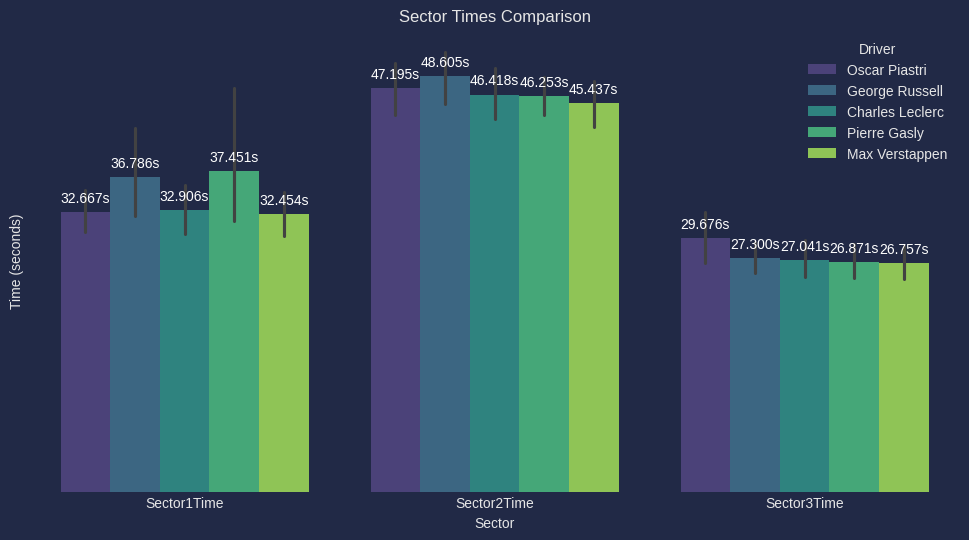

In [21]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

*Race*

In [22]:
race = f1.get_session(2025, "Bahrain", "R")
race.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


core        WARNING 	Driver 63: Lap timing integrity check failed for 3 lap(s)
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '10', '12', '4', '1', '55', '44', '22', '7', '6', '14', '31', '23', '27', '30', '5', '18', '87']


In [23]:
race.session_info

{'Meeting': {'Key': 1257,
  'Name': 'Bahrain Grand Prix',
  'OfficialName': 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2025',
  'Location': 'Sakhir',
  'Number': 4,
  'Country': {'Key': 36, 'Code': 'BRN', 'Name': 'Bahrain'},
  'Circuit': {'Key': 63, 'ShortName': 'Sakhir'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 10014,
 'Type': 'Race',
 'Name': 'Race',
 'StartDate': datetime.datetime(2025, 4, 13, 18, 0),
 'EndDate': datetime.datetime(2025, 4, 13, 20, 0),
 'GmtOffset': datetime.timedelta(seconds=10800),
 'Path': '2025/2025-04-13_Bahrain_Grand_Prix/2025-04-13_Race/'}

In [24]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,NaN,NaN,NaT,
16,LEC,Ferrari,NaN,NaN,NaT,
63,RUS,Mercedes,NaN,NaN,NaT,
10,GAS,Alpine,NaN,NaN,NaT,
12,ANT,Mercedes,NaN,NaN,NaT,
4,NOR,McLaren,NaN,NaN,NaT,
1,VER,Red Bull Racing,NaN,NaN,NaT,
55,SAI,Williams,NaN,NaN,NaT,
44,HAM,Ferrari,NaN,NaN,NaT,
22,TSU,Red Bull Racing,NaN,NaN,NaT,


In [25]:
race_laps = race.laps
race_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:13.882000,PIA,81,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.130000,...,False,McLaren,0 days 00:55:34.907000,2025-04-13 15:03:49.174,1,1.0,False,,False,False
1,0 days 00:58:51.374000,PIA,81,0 days 00:01:37.492000,2.0,1.0,NaT,NaT,0 days 00:00:31.139000,0 days 00:00:42.343000,...,False,McLaren,0 days 00:57:13.882000,2025-04-13 15:05:28.149,1,1.0,False,,False,True
2,0 days 01:00:29.457000,PIA,81,0 days 00:01:38.083000,3.0,1.0,NaT,NaT,0 days 00:00:31.306000,0 days 00:00:42.727000,...,False,McLaren,0 days 00:58:51.374000,2025-04-13 15:07:05.641,1,1.0,False,,False,True
3,0 days 01:02:07.590000,PIA,81,0 days 00:01:38.133000,4.0,1.0,NaT,NaT,0 days 00:00:31.326000,0 days 00:00:42.796000,...,False,McLaren,0 days 01:00:29.457000,2025-04-13 15:08:43.724,1,1.0,False,,False,True
4,0 days 01:03:45.633000,PIA,81,0 days 00:01:38.043000,5.0,1.0,NaT,NaT,0 days 00:00:31.305000,0 days 00:00:42.690000,...,False,McLaren,0 days 01:02:07.590000,2025-04-13 15:10:21.857,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0 days 02:25:26.020000,BEA,87,0 days 00:01:38.422000,53.0,3.0,NaT,NaT,0 days 00:00:31.106000,0 days 00:00:43.151000,...,True,Haas F1 Team,0 days 02:23:47.598000,2025-04-13 16:32:01.865,1,10.0,False,,False,True
1124,0 days 02:27:04.663000,BEA,87,0 days 00:01:38.643000,54.0,3.0,NaT,NaT,0 days 00:00:31.138000,0 days 00:00:43.190000,...,True,Haas F1 Team,0 days 02:25:26.020000,2025-04-13 16:33:40.287,1,10.0,True,TRACK LIMITS AT TURN 13 LAP 54,False,True
1125,0 days 02:28:43.505000,BEA,87,0 days 00:01:38.842000,55.0,3.0,NaT,NaT,0 days 00:00:31.473000,0 days 00:00:43.130000,...,True,Haas F1 Team,0 days 02:27:04.663000,2025-04-13 16:35:18.930,1,10.0,False,,False,True
1126,0 days 02:30:22.514000,BEA,87,0 days 00:01:39.009000,56.0,3.0,NaT,NaT,0 days 00:00:31.459000,0 days 00:00:43.332000,...,True,Haas F1 Team,0 days 02:28:43.505000,2025-04-13 16:36:57.772,1,10.0,False,,False,True


In [26]:
pia_race_laps = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race_laps.pick_fastest().LapTime
pia_race_lap_time = pia_race_laps["LapTime"]
pia_race_sec1 = pia_race_laps["Sector1Time"]
pia_race_sec2 = pia_race_laps["Sector2Time"]
pia_race_sec3 = pia_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_pia_race), "which was in Lap number" ,pia_race_laps.pick_fastest().LapNumber)
pia_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.140000 which was in Lap number 36.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:42.130000,0 days 00:00:23.956000,233.0,244.0,274.0,250.0
1,0 days 00:01:37.492000,0 days 00:00:31.139000,0 days 00:00:42.343000,0 days 00:00:24.010000,234.0,239.0,276.0,288.0
2,0 days 00:01:38.083000,0 days 00:00:31.306000,0 days 00:00:42.727000,0 days 00:00:24.050000,233.0,236.0,276.0,290.0
3,0 days 00:01:38.133000,0 days 00:00:31.326000,0 days 00:00:42.796000,0 days 00:00:24.011000,232.0,237.0,277.0,293.0
4,0 days 00:01:38.043000,0 days 00:00:31.305000,0 days 00:00:42.690000,0 days 00:00:24.048000,231.0,236.0,276.0,290.0


In [27]:
fastest_lap_pia_race = pia_race_laps.pick_fastest()
tele_pia_race = fastest_lap_pia_race.get_telemetry().add_distance()
speed_pia_race = tele_pia_race.Speed
tele_pia_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,284,7,11393
3,285,7,11401
4,286,7,11436
5,287,7,11471
6,287,7,11500
...,...,...,...
707,273,7,10973
708,274,7,11027
709,277,7,11163
710,281,7,11299


In [28]:
lec_race_laps = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race_laps.pick_fastest().LapTime
lec_race_lap_time = lec_race_laps["LapTime"]
lec_race_sec1 = lec_race_laps["Sector1Time"]
lec_race_sec2 = lec_race_laps["Sector2Time"]
lec_race_sec3 = lec_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_lec_race), "which was in Lap number" ,lec_race_laps.pick_fastest().LapNumber)
lec_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:36.132000 which was in Lap number 36.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
57,NaT,NaT,0 days 00:00:43.164000,0 days 00:00:24.036000,233.0,250.0,280.0,256.0
58,0 days 00:01:38.048000,0 days 00:00:31.404000,0 days 00:00:42.615000,0 days 00:00:24.029000,223.0,250.0,282.0,289.0
59,0 days 00:01:38.463000,0 days 00:00:31.396000,0 days 00:00:42.837000,0 days 00:00:24.230000,NaN,257.0,283.0,300.0
60,0 days 00:01:38.273000,0 days 00:00:31.373000,0 days 00:00:42.588000,0 days 00:00:24.312000,NaN,256.0,281.0,297.0
61,0 days 00:01:38.427000,0 days 00:00:31.449000,0 days 00:00:42.592000,0 days 00:00:24.386000,225.0,261.0,285.0,302.0


In [29]:
fastest_lap_lec_race = lec_race_laps.pick_fastest()
tele_lec_race = fastest_lap_lec_race.get_telemetry().add_distance()
speed_lec_race = tele_lec_race.Speed
tele_lec_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,287,7,11502
3,289,7,11540
4,289,7,11577
5,289,7,11615
6,290,7,11652
...,...,...,...
715,283,7,11407
716,284,7,11451
717,287,7,11531
718,287,7,11545


In [30]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:36.167000 which was in Lap number 29.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
342,NaT,NaT,0 days 00:00:43.964000,0 days 00:00:24.393000,209.0,234.0,281.0,258.0
343,0 days 00:01:38.403000,0 days 00:00:31.183000,0 days 00:00:42.971000,0 days 00:00:24.249000,229.0,244.0,286.0,296.0
344,0 days 00:01:38.475000,0 days 00:00:30.952000,0 days 00:00:43.091000,0 days 00:00:24.432000,228.0,245.0,286.0,312.0
345,0 days 00:01:38.549000,0 days 00:00:30.908000,0 days 00:00:43.238000,0 days 00:00:24.403000,234.0,245.0,287.0,317.0
346,0 days 00:01:38.760000,0 days 00:00:31.138000,0 days 00:00:43.175000,0 days 00:00:24.447000,232.0,249.0,285.0,310.0


In [31]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,298,7,10805
3,300,8,10724
4,300,8,10748
5,301,8,10772
6,302,8,10796
...,...,...,...
708,282,7,11201
709,283,7,11239
710,284,7,11277
711,285,7,11315


In [32]:
rus_race_laps = race.laps.pick_driver("RUS")
fastest_lap_rus_race = rus_race_laps.pick_fastest().LapTime
rus_race_lap_time = rus_race_laps["LapTime"]
rus_race_sec1 = rus_race_laps["Sector1Time"]
rus_race_sec2 = rus_race_laps["Sector2Time"]
rus_race_sec3 = rus_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_rus_race), "which was in Lap number" ,rus_race_laps.pick_fastest().LapNumber)
rus_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:35.518000 which was in Lap number 36.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
114,NaT,NaT,0 days 00:00:42.305000,0 days 00:00:23.820000,232.0,249.0,279.0,251.0
115,0 days 00:01:37.817000,0 days 00:00:31.075000,0 days 00:00:42.830000,0 days 00:00:23.912000,228.0,246.0,280.0,296.0
116,0 days 00:01:38.286000,0 days 00:00:31.490000,0 days 00:00:42.703000,0 days 00:00:24.093000,231.0,244.0,280.0,293.0
117,0 days 00:01:38.378000,0 days 00:00:31.455000,0 days 00:00:42.808000,0 days 00:00:24.115000,NaN,245.0,280.0,302.0
118,0 days 00:01:38.604000,0 days 00:00:31.416000,0 days 00:00:43.034000,0 days 00:00:24.154000,230.0,246.0,279.0,298.0


In [33]:
fastest_lap_rus_race = rus_race_laps.pick_fastest()
tele_rus_race = fastest_lap_rus_race.get_telemetry().add_distance()
speed_rus_race = tele_rus_race.Speed
tele_rus_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,290,8,10369
3,291,8,10394
4,292,8,10439
5,293,8,10485
6,293,8,10518
...,...,...,...
709,283,7,11616
710,284,7,11665
711,285,7,11714
712,286,7,11263


In [34]:
ver_race_laps = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race_laps.pick_fastest().LapTime
ver_race_lap_time = ver_race_laps["LapTime"]
ver_race_sec1 = ver_race_laps["Sector1Time"]
ver_race_sec2 = ver_race_laps["Sector2Time"]
ver_race_sec3 = ver_race_laps["Sector3Time"]
print("Fastest Lap:", convert_to_normal(fastest_lap_ver_race), "which was in Lap number" ,ver_race_laps.pick_fastest().LapNumber)
ver_race_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:36.167000 which was in Lap number 29.0


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
342,NaT,NaT,0 days 00:00:43.964000,0 days 00:00:24.393000,209.0,234.0,281.0,258.0
343,0 days 00:01:38.403000,0 days 00:00:31.183000,0 days 00:00:42.971000,0 days 00:00:24.249000,229.0,244.0,286.0,296.0
344,0 days 00:01:38.475000,0 days 00:00:30.952000,0 days 00:00:43.091000,0 days 00:00:24.432000,228.0,245.0,286.0,312.0
345,0 days 00:01:38.549000,0 days 00:00:30.908000,0 days 00:00:43.238000,0 days 00:00:24.403000,234.0,245.0,287.0,317.0
346,0 days 00:01:38.760000,0 days 00:00:31.138000,0 days 00:00:43.175000,0 days 00:00:24.447000,232.0,249.0,285.0,310.0


In [35]:
fastest_lap_ver_race = ver_race_laps.pick_fastest()
tele_ver_race = fastest_lap_ver_race.get_telemetry().add_distance()
speed_ver_race = tele_ver_race.Speed
tele_ver_race.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,298,7,10805
3,300,8,10724
4,300,8,10748
5,301,8,10772
6,302,8,10796
...,...,...,...
708,282,7,11201
709,283,7,11239
710,284,7,11277
711,285,7,11315


In [36]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:31.139000,0 days 00:00:42.343000,0 days 00:00:24.010000,0 days 00:01:37.492000
2,Oscar Piastri,0 days 00:00:31.306000,0 days 00:00:42.727000,0 days 00:00:24.050000,0 days 00:01:38.083000
3,Oscar Piastri,0 days 00:00:31.326000,0 days 00:00:42.796000,0 days 00:00:24.011000,0 days 00:01:38.133000
4,Oscar Piastri,0 days 00:00:31.305000,0 days 00:00:42.690000,0 days 00:00:24.048000,0 days 00:01:38.043000
5,Oscar Piastri,0 days 00:00:31.336000,0 days 00:00:42.880000,0 days 00:00:24.147000,0 days 00:01:38.363000
...,...,...,...,...,...
280,Max Verstappen,0 days 00:00:31.244000,0 days 00:00:43.025000,0 days 00:00:24.166000,0 days 00:01:38.435000
281,Max Verstappen,0 days 00:00:31.256000,0 days 00:00:42.903000,0 days 00:00:24.239000,0 days 00:01:38.398000
282,Max Verstappen,0 days 00:00:31.348000,0 days 00:00:43.164000,0 days 00:00:24.175000,0 days 00:01:38.687000
283,Max Verstappen,0 days 00:00:31.155000,0 days 00:00:42.708000,0 days 00:00:24.153000,0 days 00:01:38.016000


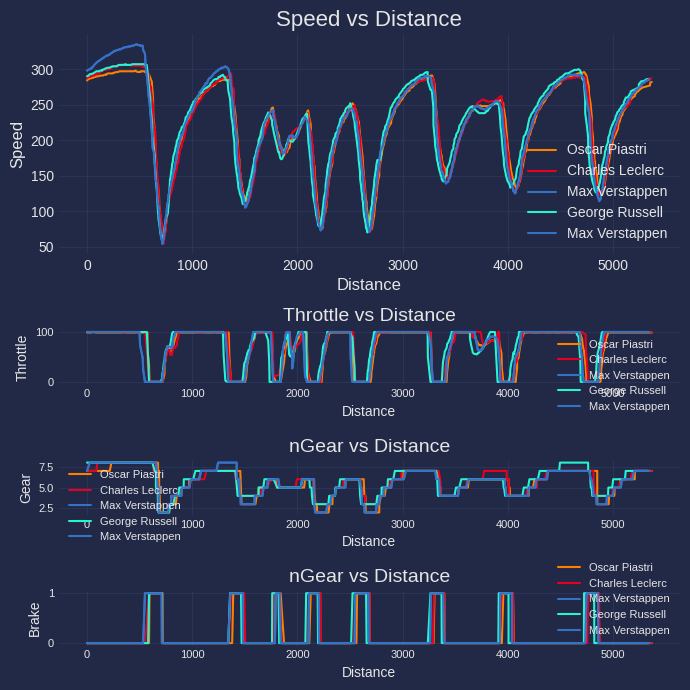

In [37]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = race.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(4, 1, figsize=(7, 7), gridspec_kw={"height_ratios": [4, 1, 1, 1]})

ax[0].plot(
    tele_pia_race.Distance, tele_pia_race.Speed, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_lec_race.Distance, tele_lec_race.Speed, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_rus_race.Distance, tele_rus_race.Speed, label="George Russell", color=get_driver_color("RUS")
)
ax[0].plot(
    tele_ver_race.Distance, tele_ver_race.Speed, label="Max Verstappen", color=get_driver_color("VER")
)

ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)
ax[1].plot(
    tele_pia_race.Distance, tele_pia_race.Throttle, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_lec_race.Distance, tele_lec_race.Throttle, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)
ax[1].plot(
    tele_rus_race.Distance, tele_rus_race.Throttle, label="George Russell", color=get_driver_color("RUS")
)
ax[1].plot(
    tele_ver_race.Distance, tele_ver_race.Throttle, label="Max Verstappen", color=get_driver_color("VER")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)
ax[2].plot(
    tele_pia_race.Distance, tele_pia_race.nGear, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[2].plot(
    tele_lec_race.Distance, tele_lec_race.nGear, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)
ax[2].plot(
    tele_rus_race.Distance, tele_rus_race.nGear, label="George Russell", color=get_driver_color("RUS")
)
ax[2].plot(
    tele_ver_race.Distance, tele_ver_race.nGear, label="Max Verstappen", color=get_driver_color("VER")
)

ax[2].set_title("nGear vs Distance", fontsize=14)
ax[2].set_xlabel("Distance", fontsize=10)
ax[2].set_ylabel("Gear", fontsize=10)
ax[2].legend(fontsize=8)
ax[2].grid(True)
ax[2].tick_params(axis="both", which="major", labelsize=8)
ax[3].plot(
    tele_pia_race.Distance, tele_pia_race.Brake, label="Oscar Piastri", color=get_driver_color("PIA")
)
ax[3].plot(
    tele_lec_race.Distance, tele_lec_race.Brake, label="Charles Leclerc", color=get_driver_color("LEC")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)
ax[3].plot(
    tele_rus_race.Distance, tele_rus_race.Brake, label="George Russell", color=get_driver_color("RUS")
)
ax[3].plot(
    tele_ver_race.Distance, tele_ver_race.Brake, label="Max Verstappen", color=get_driver_color("VER")
)

ax[3].set_title("nGear vs Distance", fontsize=14)
ax[3].set_xlabel("Distance", fontsize=10)
ax[3].set_ylabel("Brake", fontsize=10)
ax[3].legend(fontsize=8)
ax[3].grid(True)
ax[3].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()


In [38]:
driver1_sectors = pd.DataFrame(
    {
         "Driver": ["Oscar Piastri"] * len(pia_race_sec1),
        "Sector1Time": pia_race_sec1,
        "Sector2Time": pia_race_sec2,
        "Sector3Time": pia_race_sec3,
        "Lap Time": pia_race_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
         "Driver": ["Charles Leclerc"] * len(lec_race_sec1),
        "Sector1Time": lec_race_sec1,
        "Sector2Time": lec_race_sec2,
        "Sector3Time": lec_race_sec3,
        "Lap Time": lec_race_lap_time,
    }
)


driver3_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


driver4_sectors = pd.DataFrame(
    {
         "Driver": ["George Russell"] * len(rus_race_sec1),
        "Sector1Time": rus_race_sec1,
        "Sector2Time": rus_race_sec2,
        "Sector3Time": rus_race_sec3,
        "Lap Time": rus_race_lap_time,
    }
)


driver5_sectors = pd.DataFrame(
    {
         "Driver": ["Max Verstappen"] * len(ver_race_sec1),
        "Sector1Time": ver_race_sec1,
        "Sector2Time": ver_race_sec2,
        "Sector3Time": ver_race_sec3,
        "Lap Time": ver_race_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors, driver5_sectors],
    ignore_index=True,
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Oscar Piastri,0 days 00:00:31.139000,0 days 00:00:42.343000,0 days 00:00:24.010000,0 days 00:01:37.492000
2,Oscar Piastri,0 days 00:00:31.306000,0 days 00:00:42.727000,0 days 00:00:24.050000,0 days 00:01:38.083000
3,Oscar Piastri,0 days 00:00:31.326000,0 days 00:00:42.796000,0 days 00:00:24.011000,0 days 00:01:38.133000
4,Oscar Piastri,0 days 00:00:31.305000,0 days 00:00:42.690000,0 days 00:00:24.048000,0 days 00:01:38.043000
5,Oscar Piastri,0 days 00:00:31.336000,0 days 00:00:42.880000,0 days 00:00:24.147000,0 days 00:01:38.363000
...,...,...,...,...,...
280,Max Verstappen,0 days 00:00:31.244000,0 days 00:00:43.025000,0 days 00:00:24.166000,0 days 00:01:38.435000
281,Max Verstappen,0 days 00:00:31.256000,0 days 00:00:42.903000,0 days 00:00:24.239000,0 days 00:01:38.398000
282,Max Verstappen,0 days 00:00:31.348000,0 days 00:00:43.164000,0 days 00:00:24.175000,0 days 00:01:38.687000
283,Max Verstappen,0 days 00:00:31.155000,0 days 00:00:42.708000,0 days 00:00:24.153000,0 days 00:01:38.016000


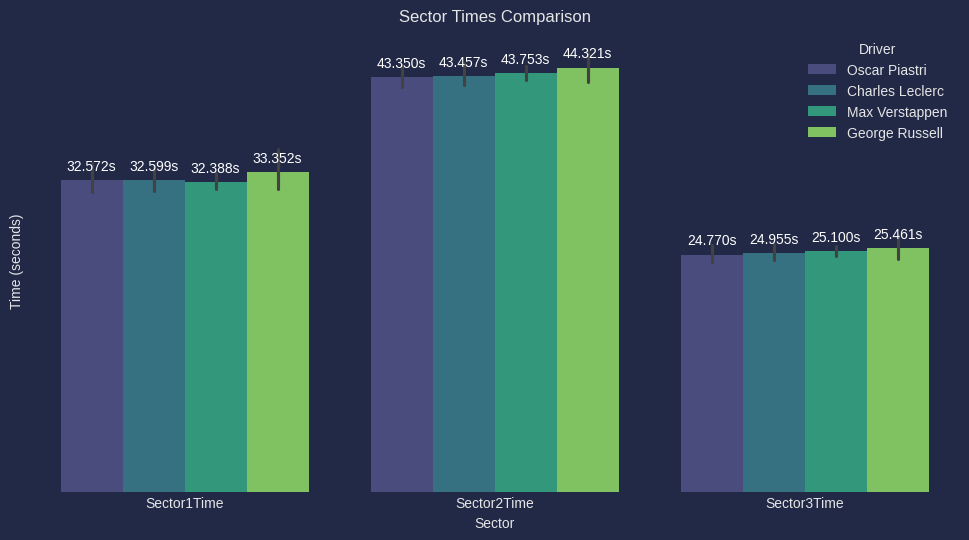

In [39]:
melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

melted_data["Time"] = melted_data["Time"].dt.total_seconds()

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(
    data=melted_data, x="Sector", y="Time", hue="Driver", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        bar_plot.annotate(
            f"{height:.3f}s",
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
        va="bottom",
            fontsize=10,
            color="white",
            xytext=(0, 5),
            textcoords="offset points",
        )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Sector")
plt.gca().set_yticks([])
plt.show()

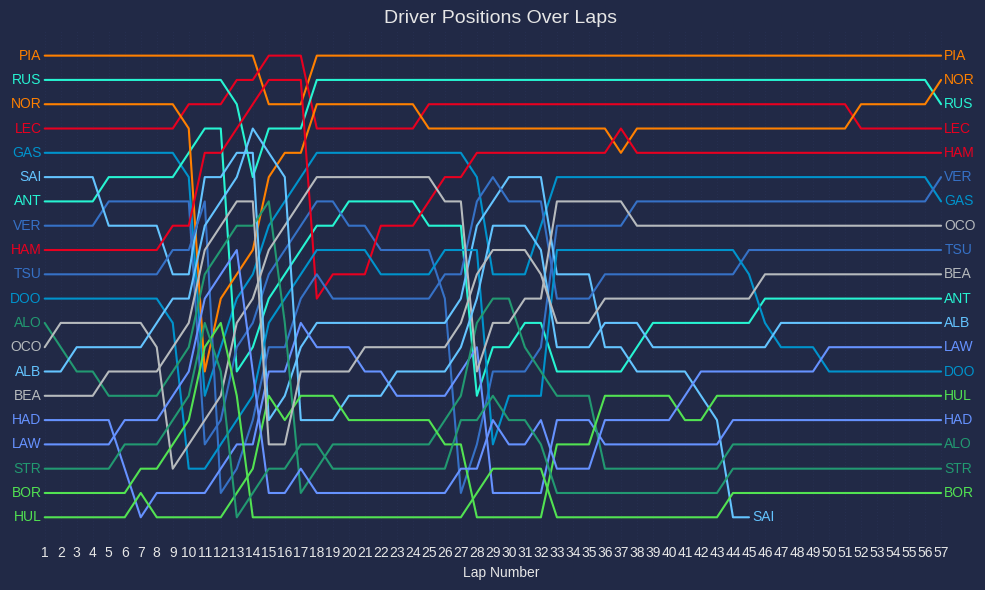

In [40]:
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

team_colors = {}

for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

plt.figure(figsize=(10, 6))
for driver in drivers_ab:
    positions = race_laps[race_laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    plt.text(
        1 - 0.2,
        positions[0],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='right'
    )
    
    plt.text(
        len(positions) + 0.2,
        positions[-1],
        driver,
        color=color,
        fontsize=10,
        verticalalignment='center',
        horizontalalignment='left'
    )

plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

In [ ]:
def getDriverPosition(abbreviation: str):
    res = race.results
    abbr = res["Abbreviation"] == abbreviation
    pos = res.loc[abbr, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "#000000")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()

In [42]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)


/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/tmp/ipykernel_8991/905247657.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
0,PIA,302.0
2,RUS,315.0
13,OCO,323.0
10,DOO,325.0
1,LEC,327.0
7,SAI,327.0
9,TSU,328.0
3,GAS,329.0
18,STR,329.0
5,NOR,330.0


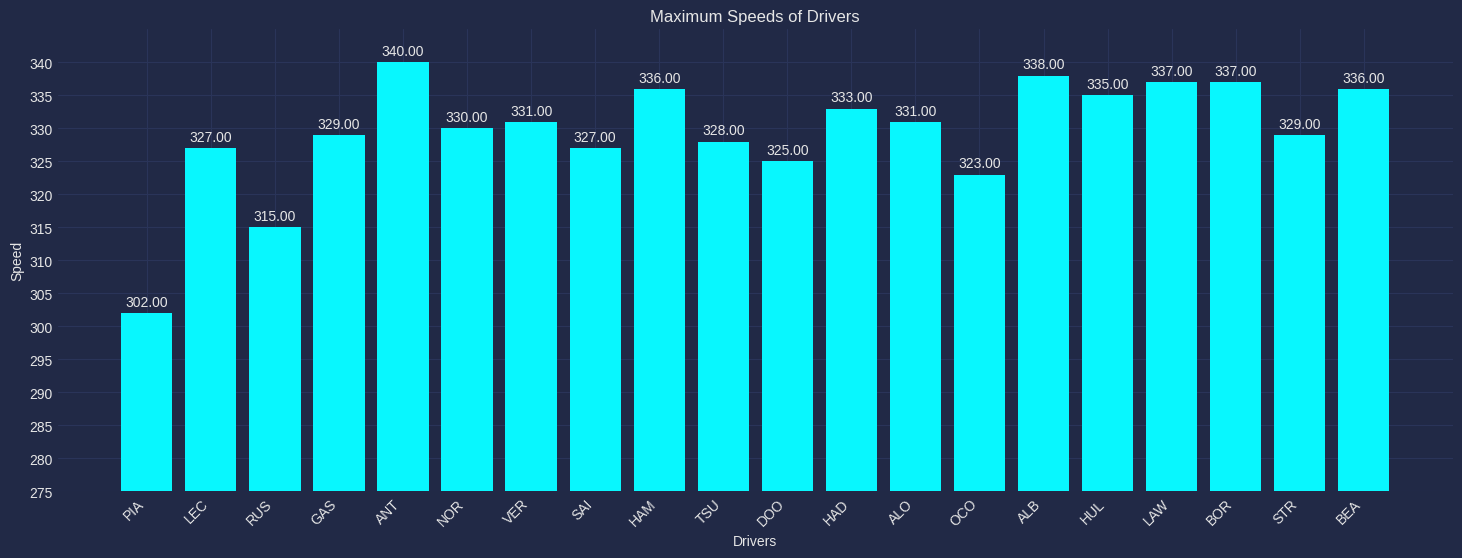

In [43]:
fig,ax = plt.subplots(figsize=(18, 6))
bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])
ax.set_xlabel('Drivers')
ax.set_ylabel('Speed')
ax.set_title('Maximum Speeds of Drivers')
plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [44]:
plotting.setup_mpl()

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [45]:
laps_ver = race_laps.pick_driver("VER")
laps_pia = race_laps.pick_driver("PIA")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_pia = laps_pia.pick_fastest().get_telemetry().add_distance()

fastest_ver["Driver"] = "VER"
fastest_pia["Driver"] = "PIA"
telemetry = pd.concat([fastest_ver,fastest_pia])

/home/sohamdesai/Coding/F1-data-analysis/.venv/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [46]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [47]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,PIA,289.913043
1,1,VER,308.000000
2,2,PIA,296.210526
3,2,VER,328.062500
4,3,PIA,287.043478
5,3,VER,281.523810
6,4,PIA,115.220000
7,4,VER,105.481481
8,5,PIA,223.875000
9,5,VER,227.555556


In [48]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [49]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'PIA', 'Fastest_driver_int'] = 2

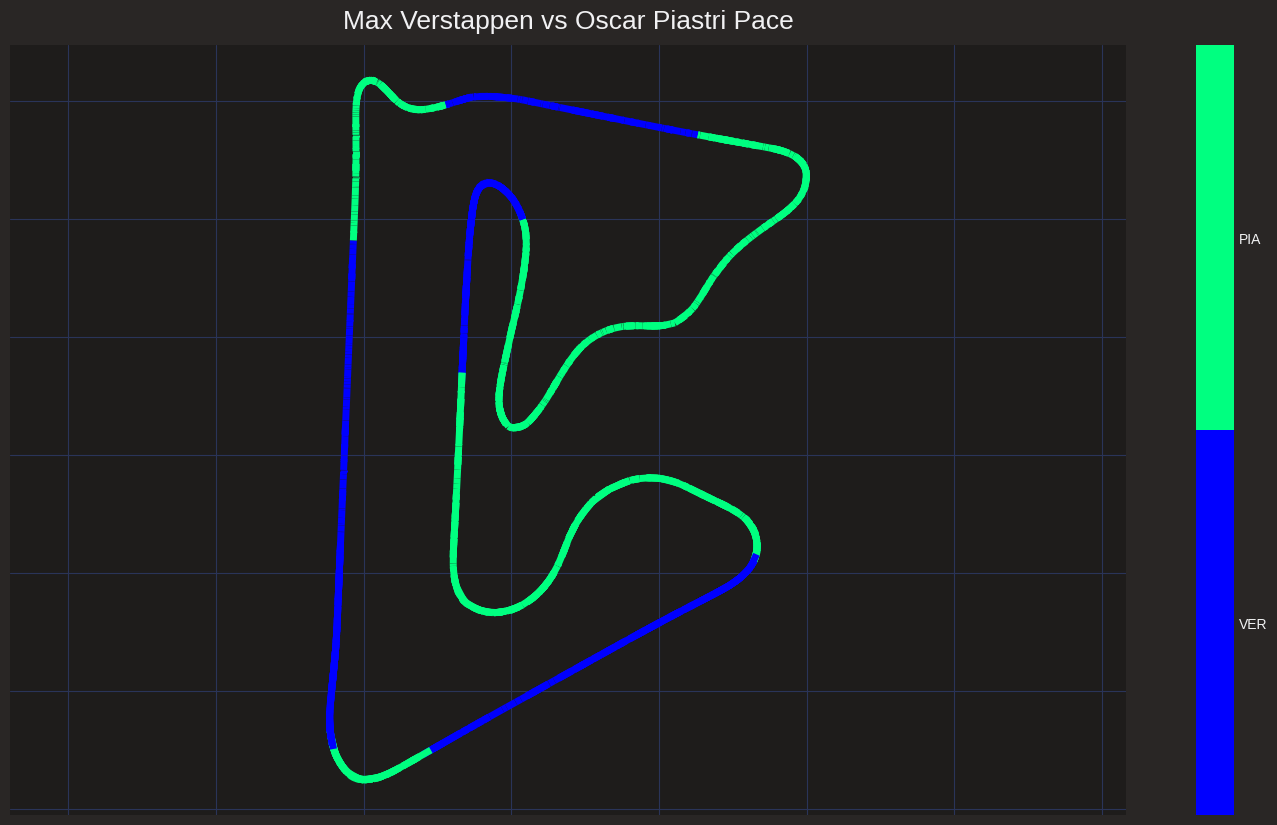

In [50]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['VER', 'PIA'])
plt.title("Max Verstappen vs Oscar Piastri Pace")
plt.show()
